## Student: Daniel Kostic

# Assignment 1

Please, answer the question by entering runable python code into the cells. Add comments at the beginning of each cell which list the packages that need to be installed (e.g., pip install collections). Run the code so that the output is visible in the notbook before you submit. The data files which you download should lie in the same directory as the python notebooks (use relative paths!). Use python 3.


Submit the notebook (as .ipynb and .pdf) via email to clwagner@uni-koblenz.de until <font color="red">8.5.2017 (midnight CET)</font>.
Subject of email: "CSS2017 ass 1"

Filename: firstname_lastname_ass1.ipynb 


## Analyzing Affiliation Networks and Social Networks (15 Points)

Download the following 2 datasets about the location-based social networking service Brightkite: http://snap.stanford.edu/data/loc-brightkite.html

One of the dataset contains all checkins between April 2008 and October 2010 (4.5 Mio checkins).

Beside the checkin data that constitute an affiliation network (two-mode network of users and locations), there is also a social network included  - i.e., a one-mode netowkr of users. It is an undirected one-mode network.



In [1]:
# Required packages: pandas, numpy, matplotlib, networkx

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import describe
import networkx as nx
edges = pd.read_csv("Brightkite_edges.txt", sep="\t", names=['node1', 'node2'])
checkIns = pd.read_csv("Brightkite_totalCheckins.txt", sep="\t", names=['user', 'time', 'lat', 'lon', 'locId'])

### Data preview

In [3]:
edges.sample(5)

,node1,node2
124700,3712,13809
284856,15498,9477
187127,7508,158
344330,25665,23141
179568,6991,20767


In [4]:
checkIns.sample(5)

,user,time,lat,lon,locId
3979647,27250,2010-06-28T17:07:59Z,0.000000,0.000000,00000000000000000000000000000000
323740,658,2009-07-04T23:24:36Z,38.881396,-94.819129,eb802398a22411dd963663f5d9524050
4037860,28561,2009-10-29T23:54:01Z,40.768950,-74.019730,bd1f74bb71d092534c54652ffaf36810
89456,153,2010-01-10T15:33:36Z,39.640264,-106.374195,ee8ff37ea22411dd9cc0ab0334e8bcd4
4467298,41604,2010-08-14T11:23:09Z,41.850033,-87.650052,ed58942aa22411dd96ff97a15c29d430


#### Location Popularity

Count the number of distinct brightkite users who checked-in at each location (using python!). What are the top 10 locations---i.e., the locations where most users checked in? Plot the rank ordered frequency distributions of locations (x-axis: locations ranked by the number of distinct users, y-axis: number of distinct users). <font color="red">(2 Points)</font>


##### Grouping data by location and displaying the count of unique users who visited a location

In [5]:
grpLoc = checkIns.groupby('locId').user.nunique()
grpLoc.sort_values(ascending=False, inplace=True)
grpLoc.head(10)

locId
00000000000000000000000000000000    3204
ee81ef22a22411ddb5e97f082c799f59    1437
ede07eeea22411dda0ef53e233ec57ca    1199
ee8b1d0ea22411ddb074dbd65f1665cf     983
ee78cc1ca22411dd9b3d576115a846a7     846
eefadd1aa22411ddb0fd7f1c9c809c0c     811
d12e8e8aa22411dd90196fa5c210e3cc     779
b9d89b5ea22411dda5ef27ee20f87cee     728
ed58942aa22411dd96ff97a15c29d430     710
b9c114f2a22411dda217eb3127033598     576
Name: user, dtype: int64

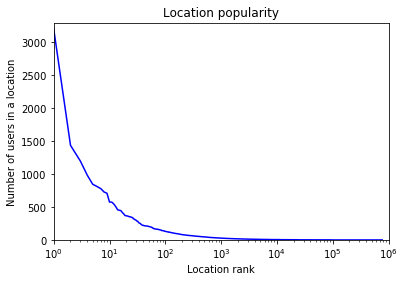

In [6]:
plt.plot([i for i in range(1,len(grpLoc)+1)], list(grpLoc), 'b-')
plt.title('Location popularity')
plt.ylabel('Number of users in a location')
plt.xlabel('Location rank')
plt.xscale('log')
plt.axis([0, 1000000, 0, 3300])
plt.show()

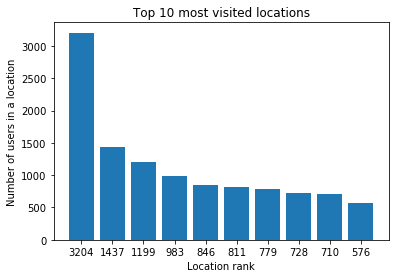

In [7]:
plt.bar([i for i in range(1,11)], list(grpLoc)[:10])
plt.title('Top 10 most visited locations')
plt.ylabel('Number of users in a location')
plt.xlabel('Location rank')
plt.xticks(list(range(1,11)), list(grpLoc)[:10])
# plt.xticks(rotation=90)
plt.show()

#### Fold Location-User Network

Construct an unweighted and undirected two-mode network of brightkite users and locations. A user and a location are connected if the user checked-in at the location at least once. Compute the degree of each location in the two-mode network and list the top 10 location-ids with their corresponding degree. Make a plot that shows the ranked locations (x-axis) and their degree (y-axis).

Fold the two-mode network and construct a location network. Since folding the full network is very slow, select only locations where at least 10 users checked in.

What are the most central locations in the one-mode network and what does that mean? 
Use different centrality measures and order nodes by these centralities and print the top 10 nodes for each measure. Discuss for each centrality measure what it does and how you can interpret the results. For example, what does it mean that location X has the highest betweeness centrality? How is location X different from location Y which has the highest degree centrality?
<font color="red">(3 Points)</font>

In [8]:
print("Checkins shape {}".format(checkIns.shape))
print("Number of duplicate entries {}".format(checkIns[checkIns.duplicated(subset=['user', 'locId'], keep='first')].shape))

Checkins shape (4747287, 5)
Number of duplicate entries (3671116, 5)


In [9]:
locUsrNtwrk = nx.from_pandas_dataframe(checkIns[['user', 'locId']], source='user', target='locId')

In [10]:
print("Number of edges: {}".format(nx.number_of_edges(locUsrNtwrk)))
print("Number of nodes: {}".format(nx.number_of_nodes(locUsrNtwrk)))
print("Graph is bipartite?: {}".format(nx.is_bipartite(locUsrNtwrk)))
print("Graph is connected?: {}".format(nx.is_connected(locUsrNtwrk)))
print("Graph is directed?: {}".format(nx.is_connected(locUsrNtwrk)))

Number of edges: 1076171
Number of nodes: 824373
Graph is bipartite?: True
Graph is connected?: False
Graph is directed?: False


##### Degrees of the top 10 nodes

In [11]:
degrees = locUsrNtwrk.degree(checkIns['locId'].unique())
degreesSorted = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
degreesSorted[:10]

[('00000000000000000000000000000000', 3204),
 ('ee81ef22a22411ddb5e97f082c799f59', 1437),
 ('ede07eeea22411dda0ef53e233ec57ca', 1199),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 983),
 ('ee78cc1ca22411dd9b3d576115a846a7', 846),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 811),
 ('d12e8e8aa22411dd90196fa5c210e3cc', 779),
 ('b9d89b5ea22411dda5ef27ee20f87cee', 728),
 ('ed58942aa22411dd96ff97a15c29d430', 710),
 ('b9c114f2a22411dda217eb3127033598', 576)]

In [12]:
degreesSortedList = [i[1] for i in degreesSorted]

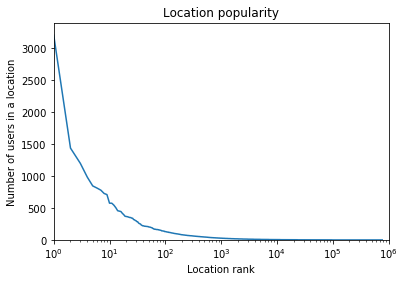

In [13]:
plt.plot([i for i in range(1, len(degreesSortedList)+1)],degreesSortedList)
plt.title('Location popularity')
plt.ylabel('Number of users in a location')
plt.xlabel('Location rank')
plt.xscale('log')
plt.axis([0, 1000000, 0, 3400])
plt.show()

##### Folding the network
##### To reduce the time needed to create the network and calculate centrality measures only locations with over 15 users were used

In [14]:
overFifteen = [i[0] for i in degreesSorted if i[1]>=15]

In [15]:
print("Number of locations with over fifteen users is {}".format(len(overFifteen)))

Number of locations with over fifteen users is 2661


In [16]:
smallerNetwork = nx.from_pandas_dataframe(checkIns[checkIns['locId'].isin(overFifteen)][['user', 'locId']], 
                                          source='user', target='locId')

In [17]:
print("Size of the network before folding is {} of nodes.".format(smallerNetwork.number_of_nodes()))

Size of the network before folding is 35274 of nodes.


In [18]:
foldedSmall = nx.projected_graph(smallerNetwork, overFifteen)

In [19]:
print("Size of the network before folding is {} of nodes.".format(foldedSmall.number_of_nodes()))

Size of the network before folding is 2661 of nodes.


Degree centrality

In [25]:
deg_cent = nx.degree_centrality(foldedSmall)

In [26]:
deg_cent_sorted = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)
deg_cent_sorted[:10]

[('00000000000000000000000000000000', 0.8759398496240602),
 ('ee81ef22a22411ddb5e97f082c799f59', 0.7875939849624061),
 ('ede07eeea22411dda0ef53e233ec57ca', 0.7285714285714286),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 0.6650375939849624),
 ('ee78cc1ca22411dd9b3d576115a846a7', 0.6263157894736843),
 ('ed58942aa22411dd96ff97a15c29d430', 0.6139097744360903),
 ('be2f1e669cc111dd9a50003048c0801e', 0.606390977443609),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 0.5909774436090226),
 ('ecbfba0ca22411ddb71dfb65ad521832', 0.5642857142857143),
 ('ed6d581aa22411dd89878ff3d9a3a80d', 0.5545112781954887)]

Degree centrality is defined as the number of ties a node has. It is a simple and easily computed centrality measure. For our network, a high degree means that a lot of users visited this location and at least another one. It also could mean that these users visited many other locations. This could be a famous location in a city (ex. London Big Ben), many people visit the city and many of its landmarks, but everyone goes for the famous one. 

Betweenness centrality

In [23]:
small_bet = nx.betweenness_centrality(foldedSmall, k=1000)

In [24]:
sorted(small_bet.items(), key=lambda x: x[1], reverse=True)[:10]

[('00000000000000000000000000000000', 0.10351528067242029),
 ('ee81ef22a22411ddb5e97f082c799f59', 0.04328849211279497),
 ('ede07eeea22411dda0ef53e233ec57ca', 0.03612522531994567),
 ('be2f1e669cc111dd9a50003048c0801e', 0.01717170571524445),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 0.014360279334246422),
 ('d12e8e8aa22411dd90196fa5c210e3cc', 0.01380931761833827),
 ('ee78cc1ca22411dd9b3d576115a846a7', 0.013268674843549207),
 ('ed6d581aa22411dd89878ff3d9a3a80d', 0.011876274968231413),
 ('ed58942aa22411dd96ff97a15c29d430', 0.011752271150497798),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 0.011110267851108576)]

Betweenness centrality is a measure based on counting how many times a shortest path goes through a node. In our example, a high betweenness centrality for a node means that this location acts like some sort of a bridge. Many different locations have common users with this location, but might not have common users in betweeen themselves.

Closeness centrality

In [27]:
close_cent = nx.closeness_centrality(foldedSmall)
close_cent_sorted = sorted(close_cent.items(), key=lambda x: x[1], reverse=True)
close_cent_sorted[:10]

[('00000000000000000000000000000000', 0.8896321070234113),
 ('ee81ef22a22411ddb5e97f082c799f59', 0.8248062015503876),
 ('ede07eeea22411dda0ef53e233ec57ca', 0.7865168539325843),
 ('ee8b1d0ea22411ddb074dbd65f1665cf', 0.7490847648549704),
 ('ee78cc1ca22411dd9b3d576115a846a7', 0.7279693486590039),
 ('ed58942aa22411dd96ff97a15c29d430', 0.7212581344902386),
 ('be2f1e669cc111dd9a50003048c0801e', 0.7175613703803615),
 ('eefadd1aa22411ddb0fd7f1c9c809c0c', 0.7097118463180363),
 ('ecbfba0ca22411ddb71dfb65ad521832', 0.6965174129353234),
 ('ed6d581aa22411dd89878ff3d9a3a80d', 0.6918075422626788)]

Closeness centrality is defined as the average length of the shortest path between a node and all other nodes in a graph. In our network, a high closeness centrality means that this location is not "far" in terms of hops needed to visit other locations. Since one hop means that 2 locations have at least a common user who visited them, this location was visited by people who visited many different locations. This keeps the "paths" to other nodes shorter.

#### Entropy of Location Popularity Distribution

How evenly distributed is the attention of brightkite users towards locations? The attention a location receives is measured by the number of distinct users who checked in at this loction. Compute the normalized entropy of the degree distribution. The degree of a location corresponds to the number of distinct users who checked in there.

To that end, you want to have one vector where each element corresponds to a distinct location. The values for each element are then determined by the number of distinct users that have checked-in at that location. Then, calculate normalized entropy for this vector.

Assume we ignore all locations where 0-1 different people checked in. That means we make the long tail of the degree distribution shorter. How would the entropy change? <font color="red">(3 Points)</font>

In [28]:
from scipy.stats import entropy
from math import log
norm_entrp = entropy(degreesSortedList)/log(len(degreesSortedList))
print("Normalized entropy for the whole dataset is: {}".format(norm_entrp))

degreesSortedListOverOne = [i[1] for i in degreesSorted if i[1]>1]
norm_entrp_over_one = entropy(degreesSortedListOverOne)/log(len(degreesSortedListOverOne))
print("After removing locations with only one visit: {}".format(norm_entrp_over_one))

Normalized entropy for the whole dataset is: 0.9663580645695315
After removing locations with only one visit: 0.9390431297218919


After removing the locations that have a small number of visits, the entropy decreases, but only for a small amount. This could be expected, as removing the tail lowers inequality. Likewise removing the top 1 location would increase equality. Overall the number of unique users who checked in at a location is very unevenly distributed.

#### Describe Location Popularity Distribution

In how many distinct locations did users check in on average in brightkite? 
Create a boxplot that shows the distribution of the number of distinct checkin-locations per user. What is the mean and the variance of this distribution? Compute X for the following statement: Half of the users checked in in more than X locations?  <font color="red">(2 Points)</font>

In [29]:
grpUsr = checkIns.groupby('user')['locId'].nunique()

In [30]:
stats = grpUsr.describe()
print("Mean of this distribution is at {}, and the variance is {}. \nHalf of the users checked in more than {} locations. "
      "Most of the users visited up to {} locations."
      .format(stats['mean'], stats['std']**2, stats['50%'], stats['75%']))

Mean of this distribution is at 20.93469633894876, and the variance is 2861.43277454921. 
Half of the users checked in more than 4.0 locations. Most of the users visited up to 15.0 locations.


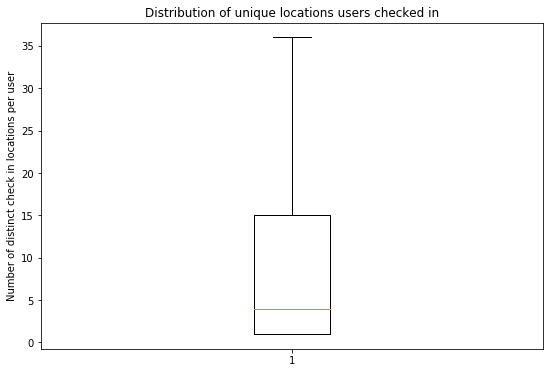

In [31]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot(grpUsr, sym='')
plt.ylabel("Number of distinct check in locations per user")
plt.title("Distribution of unique locations users checked in")
plt.show()

From the box plot we can see that half of the users only checked in at up to 4 locations. We can also see that most of the users (75 percent) visited up to 15 locations. 
Important: Outliers are not displayed on this plot.

#### Describe Social Network

Load the full Brightkite social network (loc-brightkite_edges.txt.gz). Describe the network.

Some ideas on what you could report: What's the number of nodes, edges and average degree of a node?  What is the size of the largest maximal clique in the network? How well connected is the network? <font color="red">(2 Points)</font>

In [32]:
br_network = nx.from_pandas_dataframe(edges, source='node1', target='node2')

In [33]:
print("Number of nodes is {}, and number of edges is {}. ".format(br_network.number_of_nodes(), br_network.number_of_edges()))

Number of nodes is 58228, and number of edges is 214078. 


In [34]:
br_degrees = nx.degree(br_network)
print("The average number of connections a user has is {}.".format(np.mean(list(br_degrees.values()))))

The average number of connections a user has is 7.353094731057223.


A maximal clique is a clique that cannot be extended by including one more adjecent node, meaning it is not a subset of a larger clique.

In [35]:
maximal_cliques = nx.find_cliques(br_network)
maximum = 0
cliq = []
for clique in maximal_cliques:
    if(len(clique)>maximum):
        maximum = len(clique)
        cliq = clique
print("The size of the largest maximal clique is {}".format(max))
print("Nodes in this clique are {}".format(cliq))

The size of the largest maximal clique is <built-in function max>
Nodes in this clique are [250, 10342, 6895, 10350, 2816, 10614, 2844, 2862, 10632, 2834, 10620, 10665, 10344, 10608, 10373, 10661, 2815, 10729, 10635, 10393, 10659, 2819, 2919, 10674, 2823, 10361, 6914, 10663, 10618, 10605, 10717, 10637, 10610, 6911, 6609, 10642, 2811]


### How well is the network connected?

In [36]:
print("Graph is connected?: {}".format(nx.is_connected(br_network)))
print("The number of connected components is: {}".format(nx.number_connected_components(br_network)))
print("The size of the largest connected component is: {}".format(len(max(nx.connected_components(br_network), key=len))))

Graph is connected?: False
The number of connected components is: 547
The size of the largest connected component is: 56739


#### How is the size of components distributed?

In [37]:
comp_size = [len(x) for x in nx.connected_components(br_network)]
comp_size = sorted(comp_size, reverse=True)
print("Top 10 largest components have these sizes: {}".format(comp_size[:10]))
print("We can see that we only have one significant component with most of the users, and many small isolated ones.")
print("The largest component contains {0:.2f} percentage of nodes.".format(comp_size[0]/br_network.number_of_nodes()*100))

Top 10 largest components have these sizes: [56739, 49, 11, 11, 10, 10, 9, 8, 8, 7]
We can see that we only have one significant component with most of the users, and many small isolated ones.
The largest component contains 97.44 percentage of nodes.


#### Node conectivity
Node connectivity is equal to the minimum number of nodes that must be removed to disconnect a graph

In [38]:
# nx.node_connectivity(max(nx.connected_component_subgraphs(br_network), key=len))
# Too hard to compute

#### Draw Social Network

Select the top location (i.e., the location where most distinct brightkite user checked in) and filter the brightkite social network (i.e., Brightkite_edges.txt) so that it only contains users (nodes) which checked in at the top location.
Load this subpart of the social networks into python (using the NetworkX library)
Plot the sub-network in an appealing way. <font color="red">(3 Points)</font>

In [39]:
topLoc = grpLoc.index[0]
been2TopLoc = checkIns[checkIns['locId']==topLoc].user.unique()
viz_edges = edges[edges['node1'].isin(been2TopLoc) & edges['node2'].isin(been2TopLoc)]
viz_edges = viz_edges.drop_duplicates()

In [40]:
print("Number of users who visited the top location: {}".format(len(been2TopLoc)))

Number of users who visited the top location: 3204


In [41]:
viz_net = nx.from_pandas_dataframe(viz_edges, source='node1', target='node2')

In [42]:
print("Number of edges in the social network is {}\nAnd the number of nodes is {}"
      .format(viz_net.number_of_edges(),viz_net.number_of_nodes()))

Number of edges in the social network is 20096
And the number of nodes is 2481


##### Since the largest connected component contains most of the nodes, it is used to display the network

In [43]:
Gc = max(nx.connected_component_subgraphs(viz_net), key=len)
Gc.number_of_nodes()

2342

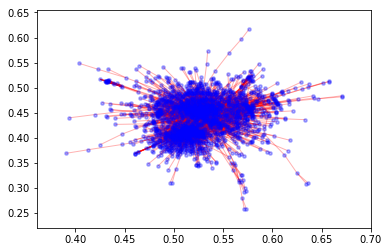

In [44]:
nx.draw_networkx(Gc, nx.spring_layout(viz_net), with_labels=False, node_size=10,edge_color='r', node_color='b', node_shape='o',
                linewidts=1.3, alpha=0.3, linewidths=1.5)
plt.show()